# helloNet - train, test and save binary classification model

Test script: Training an Image Classification Model & Predicting Images

## 1- Import Required Modules

In [1]:
from helloNet.neural_network import train_model, predict
from helloNet.preprocessing import flatten_data, normalize_data
from helloNet.datasets import load_image_classification_dataset, load_test_sample
from helloNet.models import save_model, load_model
from helloNet.hello_utils import get_decay_rate
import matplotlib.pyplot as plt
import numpy as np

## 2- Load a Built-in Dataset from helloNet

"cats_and_dogs"        -       Source: Kaggle & Petfinder Link: https://www.kaggle.com/c/dogs-vs-cats

In [2]:
dataset = load_image_classification_dataset("cats_and_dogs")

x_train = dataset["X_train"]
y_train = dataset["Y_train"]
x_val = dataset["X_val"]
y_val = dataset["Y_val"]
x_test = dataset["X_test"]
y_test = dataset["Y_test"]
classes = dataset["classes"]

Imported: test_cats_and_dogs.h5
Imported: val_cats_and_dogs.h5
Imported: classes_cats_and_dogs.h5
Imported: train_cats_and_dogs.h5

Class names: [b'Dog' b'Cat'] and Shape: (2,)
Test Set - Size: 2494	- Shapes: X_test:	(2494, 64, 64, 3),	Labels (Y_test): (1, 2494)
Val Set - Size: 4986	- Shapes: X_val:	(4986, 64, 64, 3),	Labels (Y_val): (1, 4986)
Train Set - Size: 17451	- Shapes: X_train:	(17451, 64, 64, 3),	Labels (Y_train): (1, 17451)

Returned: X_test, Y_test, X_val, Y_val, classes, X_train, Y_train in a dictionary


1


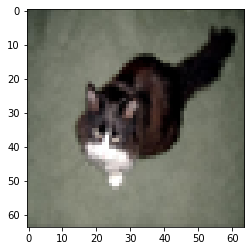

In [3]:
print(y_train[0][21])
plt.imshow(x_train[21])

### 2.1- Show Random Samples from the "Training", "Validation" and "Test" Sets

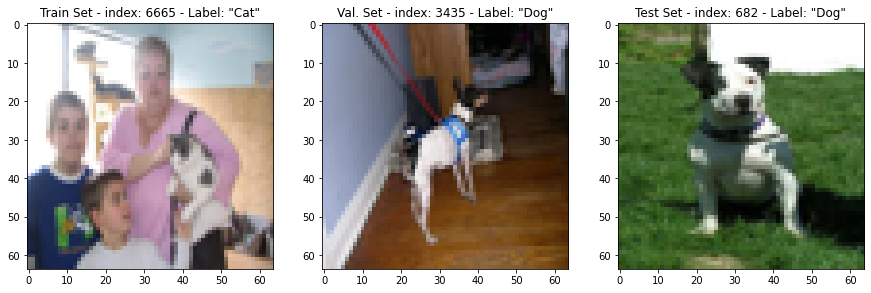

In [4]:
random_index_train = np.random.randint(0, x_train.shape[0])
random_index_val = np.random.randint(0, x_val.shape[0])
random_index_test = np.random.randint(0, x_test.shape[0])

class_train = classes[y_train[0,random_index_train]].decode("utf-8")
class_val = classes[y_val[0,random_index_val]].decode("utf-8")
class_test = classes[y_test[0, random_index_test]].decode("utf-8")

fig, axs = plt.subplots(1,3, figsize=(15,15))
axs[0].imshow(x_train[random_index_train])
axs[0].set_title(f'Train Set - index: {random_index_train} - Label: "{class_train}"')
axs[1].imshow(x_val[random_index_val])
axs[1].set_title(f'Val. Set - index: {random_index_val} - Label: "{class_val}"')
axs[2].imshow(x_test[random_index_test])
axs[2].set_title(f'Test Set - index: {random_index_test} - Label: "{class_test}"')
plt.show()

## 3- Preprocess the Dataset

In [5]:
x_train_flatten = flatten_data(x_train)
x_val_flatten = flatten_data(x_val)
x_test_flatten = flatten_data(x_test)

Flattened data - new shape: (12288, 17451)
Flattened data - new shape: (12288, 4986)
Flattened data - new shape: (12288, 2494)


In [6]:
x_train_processed = normalize_data(x_train_flatten)
x_val_processed = normalize_data(x_val_flatten)
x_test_processed = normalize_data(x_test_flatten)

Normalized data - min: 0.00 - max: 1.00
Normalized data - min: 0.00 - max: 1.00
Normalized data - min: 0.00 - max: 1.00


## 4- Model Training

Hyperparameters

In [7]:
# Model architecture
hidden_layers = [32,8]
output_unit_num = 1
hidden_activation = "relu"          # options: "relu", "sigmoid"
output_activation = "sigmoid"       # options: "relu", "sigmoid"

# Learning hyper-parameters
learning_rate = 0.001
epochs = 250
size_of_mini_batches = 96

# Regularization parameters
initialization_method = "he"        # options: "he", "xavier", "random"
regularization_method = "l2"        # options: "l2", None
lambd = 5

# Optimizer
optimizer_method = "gradient-descent"       # options: "gradient-descent", "momentum", "rmsprop", "adam"
beta1_param = 0.9
beta2_param = 0.999

batch_norm = False
learning_rate_decay = True
final_learning_rate_ratio = 0.05

# Model tracking options
print_cost = True                   # options: True, False
plot_learning_curve = True          # options: True, False 
print_cost_period = 1               # prints cost at every "?" epoch

Learning Rate Decay (OPTIONAL)

Final learning rate: 5e-05
Precision: epochs
Number of learning rates: 250
** Decay rate: 0.076 **


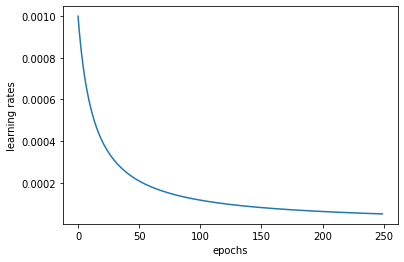

In [8]:
decay_rate = get_decay_rate(learning_rate, epochs, final_learning_rate_ratio, precision="epochs")

Starting Training with _"train_model"_ function

** The training has started. **

Number of hidden layers: 3
Hidden layer dims.:	 [32, 8, 1]
Output layer dims.:	 1
Classification type:	 "binary"
Learning rate (alpha):	 0.001
Regularization method:	 "l2"
Reg. param. (lambda):	 5
Mini batch size:	 96
Number of mini batches:	 181
Optimizer:		 "gradient-descent"

Initialization Method:	 'he'
Created: W1, b1, Shapes: (32, 12288), (32, 1)
Created: W2, b2, Shapes: (8, 32), (8, 1)
Created: W3, b3, Shapes: (1, 8), (1, 1)

Current loss for epoch 0/250 is - 0.7129 -- train accuracy: 0.5345 -- validation accuracy: 0.5499
Current loss for epoch 1/250 is - 0.7017 -- train accuracy: 0.5677 -- validation accuracy: 0.5672
Current loss for epoch 2/250 is - 0.6949 -- train accuracy: 0.5844 -- validation accuracy: 0.5768
Current loss for epoch 3/250 is - 0.6902 -- train accuracy: 0.5942 -- validation accuracy: 0.5840
Current loss for epoch 4/250 is - 0.6843 -- train accuracy: 0.6053 -- validation accuracy: 0.5929
Current loss for epoch 5/250 is - 0.6794

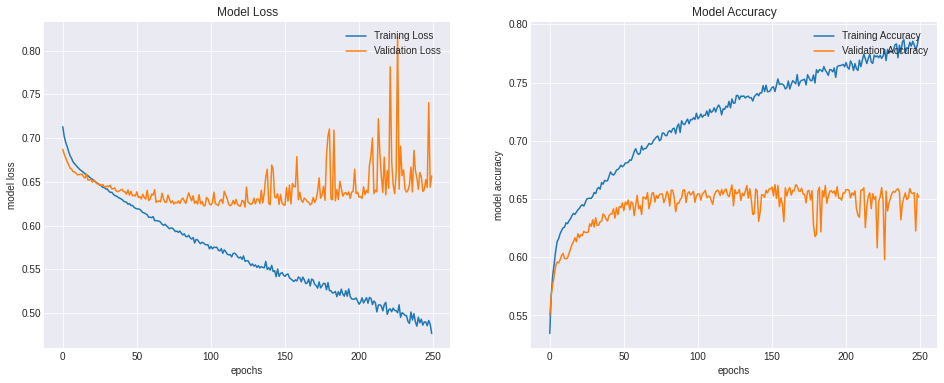

In [9]:
parameters_my_model, param_batch_norm= train_model(
    X_train= x_train_processed, 
    Y_train= y_train,
    X_test= x_val_processed,
    Y_test=y_val,
    dims_hidden_layers= hidden_layers,
    dims_output_layer= output_unit_num,
    learning_rate= learning_rate,
    num_epochs= epochs,
    size_mini_batch=size_of_mini_batches,
    initialization= initialization_method,
    regularization= regularization_method,
    lambda_val= lambd,
    optimizer=optimizer_method,
    beta1=beta1_param,
    beta2=beta2_param,
    print_cost= print_cost,
    plot_learning_curve= plot_learning_curve,
    activation_hidden_layer= hidden_activation,
    activation_output_layer= output_activation,
    period_print=print_cost_period,
    batch_normalization=batch_norm,
    )

## 5- Predict the Test Set

In [10]:
preds_test, confidences_test = predict(
    set_X= x_test_processed,
    labels_Y= y_test,
    params_model= parameters_my_model,
    batch_normalization=batch_norm,
    param_bn=param_batch_norm
    )

Set size: 2494, Number of true predictions: 1608
Model prediction accuracy: 0.6447
The prediction process took 1.844488 seconds.


## 6- Test the Model with an Sample Using Trained Parameters

### 6.1- Show Random Predictions from the Test Set 

The prediction process took 0.001317 seconds.
Random Index: 1385
Predicted label: 0.0
Confidence: 96.98%
This example is a 'Dog'!


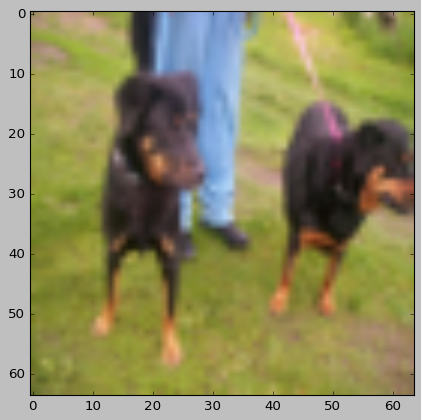

In [11]:
# Generate random index for "test" set
random_index_test = np.random.randint(0, x_test.shape[0])

# Get an image with random index
img_random_sample = x_test[random_index_test]

#Show random sample image
plt.imshow(img_random_sample)

# Get processed input data of image, reshape it for dimension compability 
img_random_processed = x_test_processed[:,random_index_test]
img_random_processed = img_random_processed.reshape(img_random_processed.shape[0], 1)

# Predict the random sample image
pred_random_sample, confidence_random_sample = predict(img_random_processed, None, parameters_my_model, batch_norm, param_batch_norm)

label_pred_random = np.squeeze(pred_random_sample)
confidence_random_sample = np.squeeze(confidence_random_sample)

if confidence_random_sample < 0.5:
    confidence_random_sample = np.abs(1-confidence_random_sample)

# Print random sample index
print("Random Index:",random_index_test)
print("Predicted label:", label_pred_random)
print(f"Confidence: {confidence_random_sample*100:.2f}%")
print(f"This example is a '{classes[int(label_pred_random)].decode('utf-8')}'!")

### 6.2 - Load & Predict a Custom Sample

Select a custom sample and load it with "load_test_sample"

Flattened data - new shape: (12288, 1)
Normalized data - min: 0.01 - max: 0.89


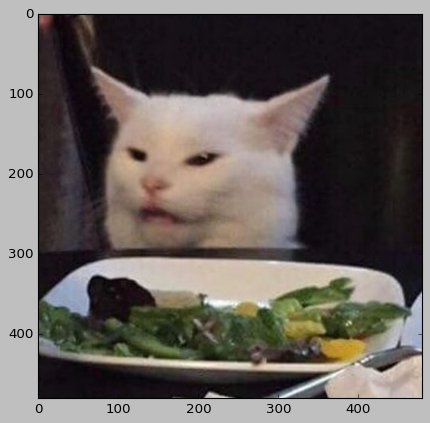

In [12]:
class_select = "cat"   # "cat" or "dog"
example_no = 1         # [1,2,3,4,5]

# Prepare the path
path_custom_sample = f"helloNet/test_examples/meme-{class_select}-{example_no}.jpg"

# Load built-in sample, flatten and normalize
img_custom_1 = load_test_sample(path_custom_sample, x_test.shape[1])


In [13]:
pred_custom_1, probability_1 = predict(img_custom_1, None, parameters_my_model, batch_norm, param_batch_norm)

The prediction process took 0.000955 seconds.


In [14]:
label_pred = np.squeeze(pred_custom_1)
probability_1 = np.squeeze(probability_1)

if probability_1 < 0.5:
    confidence_custom_1 = np.abs(1-probability_1)
else:
    confidence_custom_1 = probability_1

print("Predicted label:", label_pred)
print(f"Confidence: {confidence_custom_1*100:.2f}%")
print(f"This example is a '{classes[int(label_pred)].decode('utf-8')}'!")

Predicted label: 1.0
Confidence: 70.66%
This example is a 'Cat'!


### 6.3- Predict Another Custom Sample

Flattened data - new shape: (12288, 1)
Normalized data - min: 0.04 - max: 0.95


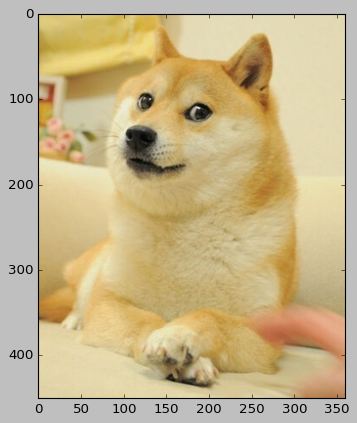

In [15]:
class_select_2 = "dog"      # "cat" or "dog"
example_no_2 = 1            # examples for "cat": [1,2,3,4,5] # examples for "noncat": [1,2,3,4,5,6,7]
path_custom_sample_2 = f"helloNet/test_examples/meme-{class_select_2}-{example_no_2}.jpg"

# Load built-in sample, flatten and normalize
img_custom_2 = load_test_sample(path_custom_sample_2, x_train.shape[1])

In [16]:
pred_custom_2, probability_2 = predict(img_custom_2, None, parameters_my_model, batch_norm, param_batch_norm)

The prediction process took 0.001074 seconds.


In [17]:
label_pred_2 = np.squeeze(pred_custom_2)
probability_2 = np.squeeze(probability_2)

if probability_2 < 0.5:
    confidence_custom_2 = np.abs(1-probability_2)
else:
    confidence_custom_2 = probability_2

print("Predicted label:", label_pred_2)
print(f"Confidence: {confidence_custom_2*100:.2f}%")
print(f"This example is a '{classes[int(label_pred_2)].decode('utf-8')}'!")

Predicted label: 0.0
Confidence: 84.17%
This example is a 'Dog'!


### 6.4- Predict Another Custom Sample

Flattened data - new shape: (12288, 1)
Normalized data - min: 0.00 - max: 1.00


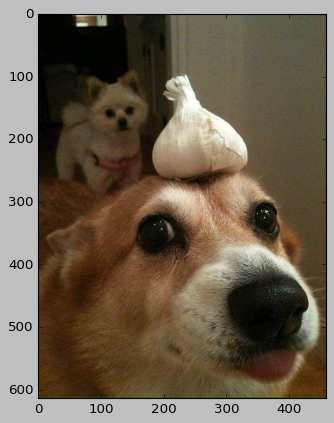

In [46]:
class_select_3 = "dog"      # "cat" or "dog"
example_no_3 = 4            # examples for "cat": [1,2,3,4,5] # examples for "noncat": [1,2,3,4,5,6,7]
path_custom_sample_3 = f"helloNet/test_examples/meme-{class_select_3}-{example_no_3}.jpg"

# Load built-in sample, flatten and normalize
img_custom_3 = load_test_sample(path_custom_sample_3, x_train.shape[1])

In [47]:
pred_custom_3, probability_3 = predict(img_custom_3, None, parameters_my_model, batch_norm, param_batch_norm)

The prediction process took 0.001059 seconds.


In [48]:
label_pred_3 = np.squeeze(pred_custom_3)
probability_3 = np.squeeze(probability_3)

if probability_3 < 0.5:
    confidence_custom_3 = np.abs(1-probability_3)
else:
    confidence_custom_3 = probability_3

print("Predicted label:", label_pred_3)
print(f"Confidence: {confidence_custom_3*100:.2f}%")
print(f"This example is a '{classes[int(label_pred_3)].decode('utf-8')}'!")

Predicted label: 0.0
Confidence: 74.46%
This example is a 'Dog'!


## 7- Save the model

In [18]:
save_model(parameters_my_model, hidden_layers, output_unit_num, classes, "my_dnn_model", time_suffix=True)

model content (keys): parameters, classes, layers, info
key content - 'parameters'	- type: 'dict',		keys: W1, b1, W2, b2, W3, b3
key content - 'classes'		- type: 'ndarray',	elements: b'Dog', b'Cat'
key content - 'layers'		- type: 'list',		elements: 32, 8, 1
key content - 'info'		- type: 'str',		*information text*
 
*The value of 'info' key returns model informations (above) as string.

Your model saved with name 'saved_models/my_dnn_model_05-23_12-21-07.pickle'


## 8- Load a Model

### 8.1- Import model

In [20]:
model_imported = load_model("my_dnn_model_01-05_16-11-33")

The model 'saved_models/my_dnn_model_01-05_16-11-33.pickle' imported.


In [21]:
print(model_imported["info"])

model content (keys): parameters, classes, layers, info
key content - 'parameters'	- type: 'dict',		keys: W1, b1, W2, b2, W3, b3
key content - 'classes'		- type: 'ndarray',	elements: b'Dog', b'Cat'
key content - 'layers'		- type: 'list',		elements: 12, 5, 1
key content - 'info'		- type: 'str',		*information text*



In [22]:
parameters_imported = model_imported["parameters"]
classes_imported    = model_imported["classes"]

### 8.2- Predict with Imported Model

In [23]:
preds_test, confidences_test = predict(x_test_processed, y_test, params_model= parameters_imported)

# Prints same results from 'Section-5'

Set size: 2494, Number of true predictions: 1545
Model prediction accuracy: 0.6195
The prediction process took 0.032676 seconds.
